# Validate candlestick patterns

In [11]:
from src import utils as u
import pandas as pd
import random
import mplfinance as mpf
import os
import numpy as np
import datetime
from configparser import ConfigParser

In [12]:
configur = ConfigParser()
print (configur.read('config.ini'))
#print ("Sections : ", configur.sections())

['config.ini']


## Get the data

### Parameters

In [13]:
asset_ticket = "BTCUSDT"
timestamp = "1d"
start_date = "1 Jan, 2020"
end_date = "30 Sep, 2022"

In [14]:
input_data_path = '../data'
input_data_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_raw"
input_data_extension = ".csv"
full_path_input_data = os.path.join(input_data_path, input_data_filename + input_data_extension)

In [15]:
df = pd.read_csv(full_path_input_data)

In [16]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLHAMMER,CDLPIERCING,CDLMORNINGSTAR,CDLSHOOTINGSTAR,CDLHANGINGMAN,CDLDARKCLOUDCOVER,CDLEVENINGSTAR,CDLENGULFING,CDLENGULFINGBULLISH,CDLENGULFINGBEARISH
0,1577836800000,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010,8946.955535,...,0,0,0,0,0,0,0,0,0,0
1,1577923200000,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667,15141.611340,...,0,0,0,0,0,0,0,0,0,0
2,1578009600000,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854,35595.496273,...,0,0,0,0,0,0,0,0,0,0
3,1578096000000,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370,16369.382248,...,0,0,0,0,0,0,0,0,0,0
4,1578182400000,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209,19455.369564,...,0,0,0,0,0,0,0,0,0,0


## Set the index on the dataframe

In [17]:
df.index = pd.DatetimeIndex(df['formatted_open_time'])

## Verify that the candlesticks are definitely showing a trend (down/up)

### Set some parameters

In [18]:
window_size = configur.getint('candlestick_patterns', 'window_size')
slope_size = configur.getint('candlestick_patterns', 'slope_size')

### Get the dates from the bullish candlesticks patterns

In [19]:
list_dates_invertedhammer = df[df['CDLINVERTEDHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_hammer = df[df['CDLHAMMER'] == 100]['formatted_open_time'].to_list()
list_dates_piercing = df[df['CDLPIERCING'] == 100]['formatted_open_time'].to_list()
list_dates_morningstar = df[df['CDLMORNINGSTAR'] == 100]['formatted_open_time'].to_list()
list_dates_bullishengulfing = df[df['CDLENGULFINGBULLISH'] == 100]['formatted_open_time'].to_list()

In [20]:
list_all_dates = df['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [21]:
print(f'BEFORE: number of inverted hammer:{len(list_dates_invertedhammer)}')
print(f'BEFORE: number of hammer:{len(list_dates_hammer)}')
print(f'BEFORE: number of piercing:{len(list_dates_piercing)}')
print(f'BEFORE: number of morning star:{len(list_dates_morningstar)}')
print(f'BEFORE: number of bullish engulfing:{len(list_dates_bullishengulfing)}')

BEFORE: number of inverted hammer:1
BEFORE: number of hammer:21
BEFORE: number of piercing:0
BEFORE: number of morning star:2
BEFORE: number of bullish engulfing:48


#### Run the checks to identify the real candlesticks with reversal

In [22]:
list_validate_dates_invertedhammer = []
list_new_sign_invertedhammer = []
for date in list_dates_invertedhammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_invertedhammer.append(date)
        list_new_sign_invertedhammer.append(1)
    else:
        list_new_sign_invertedhammer.append(0)

In [12]:
list_validate_dates_hammer = []
list_new_sign_hammer = []
for date in list_dates_hammer:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_hammer.append(date)
        list_new_sign_hammer.append(1)
    else:
        list_new_sign_hammer.append(0)        

In [13]:
list_validate_dates_piercing = []
list_new_sign_piercing = []
for date in list_dates_piercing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_piercing.append(date)
        list_new_sign_piercing.append(1)
    else:
        list_new_sign_piercing.append(0)         

In [14]:
list_validate_dates_morningstar = []
list_new_sign_morningstar = []
for date in list_dates_morningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_morningstar.append(date)
        list_new_sign_morningstar.append(1)
    else:
        list_new_sign_morningstar.append(0)          

In [15]:
list_validate_dates_bullishengulfing = []
list_new_sign_bullishengulfing = []
for date in list_dates_bullishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==-1)):
        list_validate_dates_bullishengulfing.append(date)
        list_new_sign_bullishengulfing.append(1)
    else:
        list_new_sign_bullishengulfing.append(0)          

#### Get the amount of candlesticks patterns (after check)

In [16]:
print(f'AFTER: number of inverted hammer:{len(list_validate_dates_invertedhammer)}')
print(f'AFTER: number of hammer:{len(list_validate_dates_hammer)}')
print(f'AFTER: number of piercing:{len(list_validate_dates_piercing)}')
print(f'AFTER: number of morning star:{len(list_validate_dates_morningstar)}')
print(f'AFTER: number of bullish engulfing:{len(list_validate_dates_bullishengulfing)}')

AFTER: number of inverted hammer:0
AFTER: number of hammer:2
AFTER: number of piercing:0
AFTER: number of morning star:0
AFTER: number of bullish engulfing:5


### Plot some results

#### Inverted Hammer

In [17]:
random_date = random.randint(0, len(list_validate_dates_invertedhammer)-1)
print(df.index.get_loc(list_validate_dates_invertedhammer[random_date]))
idx = df.index.get_loc(list_validate_dates_invertedhammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hammer

169


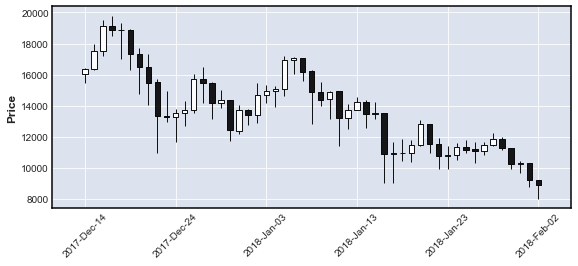

In [18]:
random_date = random.randint(0, len(list_validate_dates_hammer)-1)
print(df.index.get_loc(list_validate_dates_hammer[random_date]))
idx = df.index.get_loc(list_validate_dates_hammer[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Piercing

In [19]:
random_date = random.randint(0, len(list_validate_dates_piercing)-1)
print(df.index.get_loc(list_validate_dates_piercing[random_date]))
idx = df.index.get_loc(list_validate_dates_piercing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Morning Star

In [20]:
random_date = random.randint(0, len(list_validate_dates_morningstar)-1)
print(df.index.get_loc(list_validate_dates_morningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_morningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Bullish engulfing

486


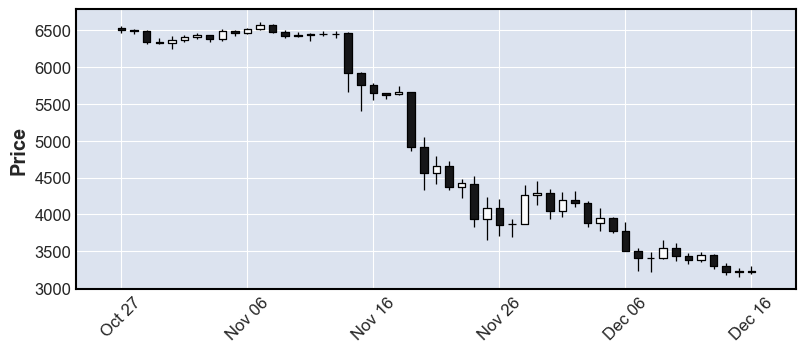

In [21]:
random_date = random.randint(0, len(list_validate_dates_bullishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bullishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bullishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

### Get the dates from the bearish candlesticks patterns

In [22]:
list_dates_shootingstar = df[df['CDLSHOOTINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_hangingman = df[df['CDLHANGINGMAN'] == -100]['formatted_open_time'].to_list()
list_dates_darkcloudcover = df[df['CDLDARKCLOUDCOVER'] == -100]['formatted_open_time'].to_list()
list_dates_eveningstar = df[df['CDLEVENINGSTAR'] == -100]['formatted_open_time'].to_list()
list_dates_bearishengulfing = df[df['CDLENGULFINGBEARISH'] == -100]['formatted_open_time'].to_list()

#### Get the amount of candlesticks patterns (before check)

In [23]:
print(f'BEFORE: number of shooting star:{len(list_dates_shootingstar)}')
print(f'BEFORE: number of hangingman:{len(list_dates_hangingman)}')
print(f'BEFORE: number of dark cloud cover:{len(list_dates_darkcloudcover)}')
print(f'BEFORE: number of evening star:{len(list_dates_eveningstar)}')
print(f'BEFORE: number of bearish engulfing:{len(list_dates_bearishengulfing)}')

BEFORE: number of shooting star:2
BEFORE: number of hangingman:16
BEFORE: number of dark cloud cover:0
BEFORE: number of evening star:1
BEFORE: number of bearish engulfing:65


#### Run the checks to identify the real candlesticks with reversal

In [24]:
list_validate_dates_shootingstar = []
list_new_sign_shootingstar = []
for date in list_dates_shootingstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_shootingstar.append(date)
        list_new_sign_shootingstar.append(-1)
    else:
        list_new_sign_shootingstar.append(0)                    

In [25]:
list_validate_dates_hangingman = []
list_new_sign_hangingman = []
for date in list_dates_hangingman:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_hangingman.append(date)
        list_new_sign_hangingman.append(-1)
    else:
        list_new_sign_hangingman.append(0)         

In [26]:
list_validate_dates_darkcloudcover = []
list_new_sign_darkcloudcover = []
for date in list_dates_darkcloudcover:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_darkcloudcover.append(date)
        list_new_sign_darkcloudcover.append(-1)
    else:
        list_new_sign_darkcloudcover.append(0)          

In [27]:
list_validate_dates_eveningstar = []
list_new_sign_eveningstar = []
for date in list_dates_eveningstar:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_eveningstar.append(date)
        list_new_sign_eveningstar.append(-1)
    else:
        list_new_sign_eveningstar.append(0)         

In [28]:
list_validate_dates_bearishengulfing = []
list_new_sign_bearishengulfing = []
for date in list_dates_bearishengulfing:
    s = u.check_trend(df, date, window_size, slope_size)
    if ((s==1)):
        list_validate_dates_bearishengulfing.append(date)
        list_new_sign_bearishengulfing.append(-1)
    else:
        list_new_sign_bearishengulfing.append(0)         

#### Get the amount of candlesticks patterns (after check)

In [29]:
print(f'AFTER: number of shooting star:{len(list_validate_dates_shootingstar)}')
print(f'AFTER: number of hangingman:{len(list_validate_dates_hangingman)}')
print(f'AFTER: number of dark cloud cover:{len(list_validate_dates_darkcloudcover)}')
print(f'AFTER: number of evening star:{len(list_validate_dates_eveningstar)}')
print(f'AFTER: number of bearish engulfoing:{len(list_validate_dates_bearishengulfing)}')

AFTER: number of shooting star:0
AFTER: number of hangingman:11
AFTER: number of dark cloud cover:0
AFTER: number of evening star:0
AFTER: number of bearish engulfoing:25


### Plot some results

#### Shooting Star

In [30]:
random_date = random.randint(0, len(list_validate_dates_shootingstar)-1)
print(df.index.get_loc(list_validate_dates_shootingstar[random_date]))
idx = df.index.get_loc(list_validate_dates_shootingstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Hangingman

199


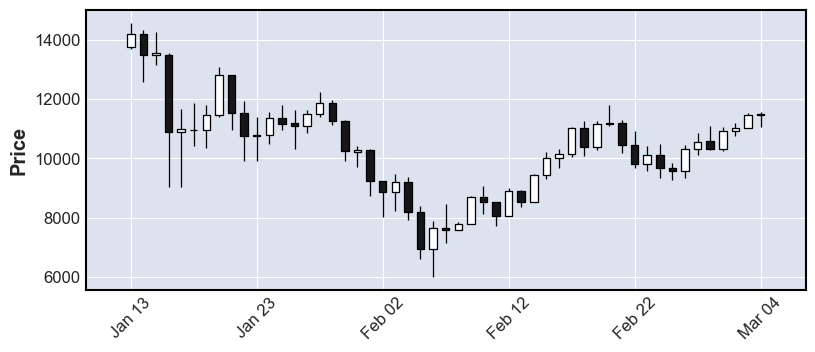

In [31]:
random_date = random.randint(0, len(list_validate_dates_hangingman)-1)
print(df.index.get_loc(list_validate_dates_hangingman[random_date]))
idx = df.index.get_loc(list_validate_dates_hangingman[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

#### Dark Cloud Cover

In [32]:
random_date = random.randint(0, len(list_validate_dates_darkcloudcover)-1)
print(df.index.get_loc(list_validate_dates_darkcloudcover[random_date]))
idx = df.index.get_loc(list_validate_dates_darkcloudcover[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Evening Star

In [33]:
random_date = random.randint(0, len(list_validate_dates_eveningstar)-1)
print(df.index.get_loc(list_validate_dates_eveningstar[random_date]))
idx = df.index.get_loc(list_validate_dates_eveningstar[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

ValueError: empty range for randrange() (0, 0, 0)

#### Bearish Engulfing

135


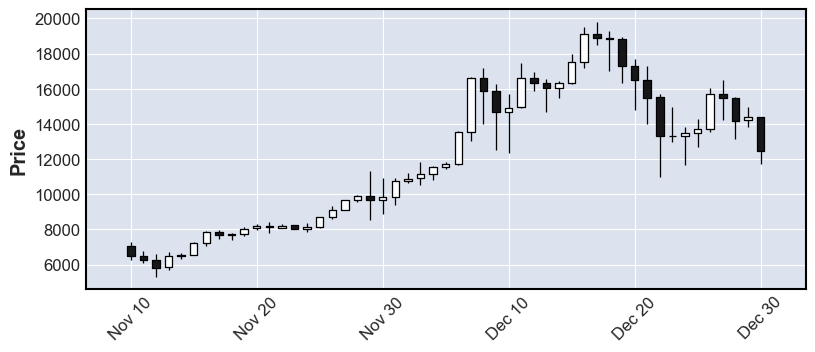

In [34]:
random_date = random.randint(0, len(list_validate_dates_bearishengulfing)-1)
print(df.index.get_loc(list_validate_dates_bearishengulfing[random_date]))
idx = df.index.get_loc(list_validate_dates_bearishengulfing[random_date])
df_temp = df.iloc[idx - window_size :idx + 1]
mpf.plot(df_temp, type='candle', figsize=(10,4))

## Create the Data with the validation

In [35]:
# list_new_column_name = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW']
# list_of_list_valid_dates = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar]
# list_of_list_new_sign = [list_new_sign_invertedhammer, list_new_sign_hammer, list_new_sign_piercing, list_new_sign_morningstar, list_new_sign_shootingstar, list_new_sign_hangingman, list_new_sign_darkcloudcover, list_new_sign_eveningstar]

list_new_column_name_pos = ['CDLINVERTEDHAMMER_NEW', 'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW', 'CDLENGULFINGBULLISH_NEW']
list_new_column_name_neg = ['CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW', 'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW', 'CDLENGULFINGBEARISH_NEW']

list_of_list_valid_dates_pos = [list_validate_dates_invertedhammer, list_validate_dates_hammer, list_validate_dates_piercing, list_validate_dates_morningstar, list_validate_dates_bullishengulfing]
list_of_list_valid_dates_neg = [list_validate_dates_shootingstar, list_validate_dates_hangingman, list_validate_dates_darkcloudcover, list_validate_dates_eveningstar, list_validate_dates_bearishengulfing]

In [36]:
df.shape

(1598, 28)

In [37]:
for i in range(0, len(list_new_column_name_pos)):
    df[list_new_column_name_pos[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_pos[i]), 1, 0)

In [38]:
for i in range(0, len(list_new_column_name_neg)):
    df[list_new_column_name_neg[i]] = np.where(df['formatted_open_time'].isin(list_of_list_valid_dates_neg[i]), -1, 0)

In [39]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-08-17,1502928000000,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,...,0,0,0,0,0,0,0,0,0,0
2017-08-18,1503014400000,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,...,0,0,0,0,0,0,0,0,0,0
2017-08-19,1503100800000,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,...,0,0,0,0,0,0,0,0,0,0
2017-08-20,1503187200000,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,...,0,0,0,0,0,0,0,0,0,0
2017-08-21,1503273600000,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,...,0,0,0,0,0,0,0,0,0,0


### Check

In [40]:
df[df['CDLENGULFINGBEARISH_NEW'] == -1]

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,CDLINVERTEDHAMMER_NEW,CDLHAMMER_NEW,CDLPIERCING_NEW,CDLMORNINGSTAR_NEW,CDLENGULFINGBULLISH_NEW,CDLSHOOTINGSTAR_NEW,CDLHANGINGMAN_NEW,CDLDARKCLOUDCOVER_NEW,CDLEVENINGSTAR_NEW,CDLENGULFINGBEARISH_NEW
formatted_open_time,,,,,,,,,,,,,,,,,,,,,
2017-11-23,1511395200000,8233.03,8260.00,8000.00,8019.99,4093.952687,1511481599999,3.340070e+07,16625,2163.755131,...,0,0,0,0,0,0,0,0,0,-1
2017-12-30,1514592000000,14378.99,14398.85,11750.00,12440.01,19221.158039,1514678399999,2.478040e+08,190204,9530.517860,...,0,0,0,0,0,0,0,0,0,-1
2018-03-24,1521849600000,8898.04,8999.95,8491.00,8546.86,35466.609572,1521935999999,3.132548e+08,270300,17302.108090,...,0,0,0,0,0,0,0,0,0,-1
2018-07-20,1532044800000,7468.86,7700.00,7273.00,7337.53,46140.313447,1532131199999,3.428627e+08,251391,24006.584622,...,0,0,0,0,0,0,0,0,0,-1
2018-10-17,1539734400000,6762.76,6811.12,6676.01,6740.89,26641.431379,1539820799999,1.796417e+08,158746,13752.475923,...,0,0,0,0,0,0,0,0,0,-1
2019-01-20,1547942400000,3665.75,3693.73,3475.00,3539.28,27901.938598,1548028799999,9.976724e+07,204941,13875.111381,...,0,0,0,0,0,0,0,0,0,-1
2019-02-13,1550016000000,3631.51,3670.00,3591.75,3609.40,25773.997648,1550102399999,9.335074e+07,167690,13552.846420,...,0,0,0,0,0,0,0,0,0,-1
2019-02-24,1550966400000,4118.00,4198.00,3712.66,3743.56,62224.186890,1551052799999,2.441468e+08,410578,30284.980963,...,0,0,0,0,0,0,0,0,0,-1
2019-03-31,1553990400000,4106.99,4116.12,4082.57,4103.95,13525.087433,1554076799999,5.547215e+07,124046,6824.657378,...,0,0,0,0,0,0,0,0,0,-1


## Export the Data

### Export parameters

In [41]:
export_path = "../data"
export_filename = "binance" + \
                  "_" + asset_ticket + \
                  "_" + timestamp + \
                  "_from_" + datetime.datetime.strptime(start_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_to_" + datetime.datetime.strptime(end_date,'%d %b, %Y').strftime('%Y_%m_%d') + \
                  "_candlesticks_signals_processed"
export_extension = ".csv"
full_export_path = os.path.join(export_path, export_filename + export_extension)

### Export

In [42]:
df.to_csv(full_export_path, index=False)